In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection

# cargamos los datos
data = pd.read_csv('Dataset_multivariable.csv')

# dividimos los datos en entrenamiento 0.7 y test 0.2 con sklearn
train_data, test_data = model_selection.train_test_split(data, test_size=0.3, random_state=0)

print('tr:', train_data)
print('ts:', test_data)

tr:     x1   x2    x3    x4    x5     y
9  1.0  2.2 -39.0  48.0  25.5  37.7
1  1.0  0.6 -15.0  16.0  11.9  14.5
6  1.0  1.6 -30.0  36.0  20.4  29.0
7  1.0  1.8 -33.0  40.0  22.1  31.9
3  1.0  1.0 -21.0  24.0  15.3  20.3
0  1.0  0.4 -12.0  12.0  10.2  11.6
5  1.0  1.4 -27.0  32.0  18.7  26.1
ts:     x1   x2    x3    x4    x5     y
2  1.0  0.8 -18.0  20.0  13.6  17.4
8  1.0  2.0 -36.0  44.0  23.8  34.8
4  1.0  1.2 -24.0  28.0  17.0  23.2


In [13]:
numero_variables = train_data.shape[1] - 1
w = np.zeros(numero_variables)
alpha = 0.000006
y = lambda x: np.dot(w, x)
y_pred = [] # predicciones
error = [] # errores
ws = [] # pesos

# entrenamiento
for i in range(4):
  # calculamos los pesos
  for column in range(numero_variables):
    w[column] = w[column] - 2*alpha * np.dot(w[column]*train_data.iloc[:, column] - train_data.iloc[:, numero_variables], train_data.iloc[:, column])
  ws.append(w.copy())
  # calculamos una predicción
  y_pred.append(y(test_data.iloc[:, :numero_variables].T.values))
  # calculamos el error
  error.append(np.sum(abs(y_pred[-1] - test_data.iloc[:, numero_variables])))

# pintamos los pesos
print(*ws, end='\n\n', sep='\n')

# pintamos las predicciones
print(*y_pred, end='\n\n', sep='\n')

# pintamos los errores
print(*error, end='\n\n', sep='\n')

[ 0.0020532   0.00308328 -0.0585684   0.0698784   0.04016964]
[ 0.00410623  0.00616604 -0.11358826  0.13371931  0.07918999]
[ 0.00615908  0.00924827 -0.16527457  0.19204436  0.11709392]
[ 0.00821177  0.01232999 -0.21382932  0.24533013  0.15391339]

[3.00262613 6.14736919 4.05087382]
[ 5.80499764 11.87398673  7.827994  ]
[ 8.4218645  17.21132733 11.35168545]
[10.86682804 22.18839129 14.64068245]

62.199130864
49.89302162435802
38.415122717705565
27.70409822430359



Ploteamos los resultados

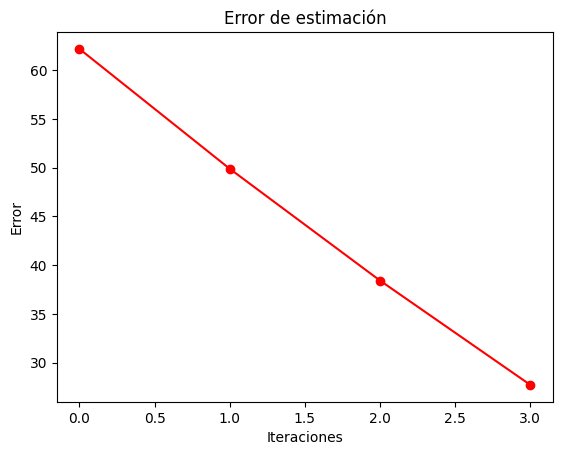

In [14]:
# graficamos el error de estimación
plt.plot(range(len(error)), error, 'o-', c='r')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.title('Error de estimación')
plt.show()